In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import pyabf

In [29]:
abf_base=pyabf.ABF("../data/WT PPR sample trace/DL_Baseline.abf")
abf_dur=pyabf.ABF("../data/WT PPR sample trace/DL_duringQP.abf")
abf_after=pyabf.ABF("../data/WT PPR sample trace/DL_afterQP.abf")

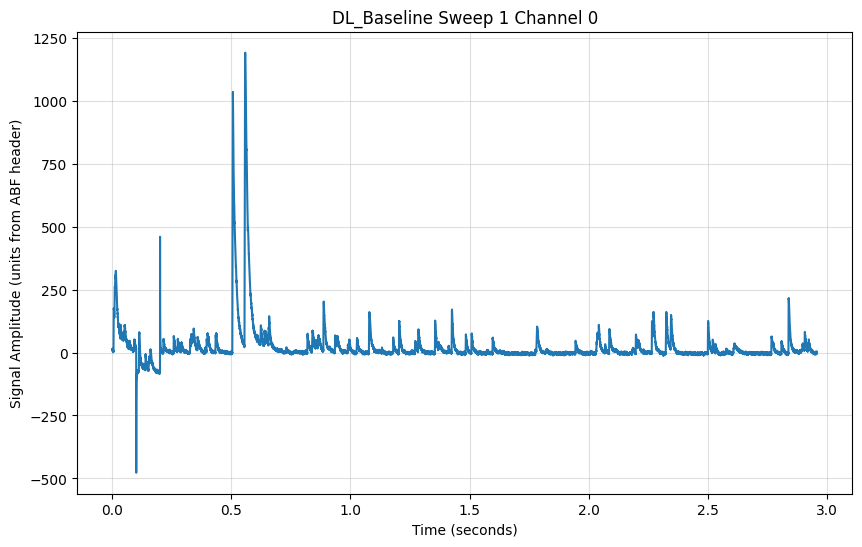

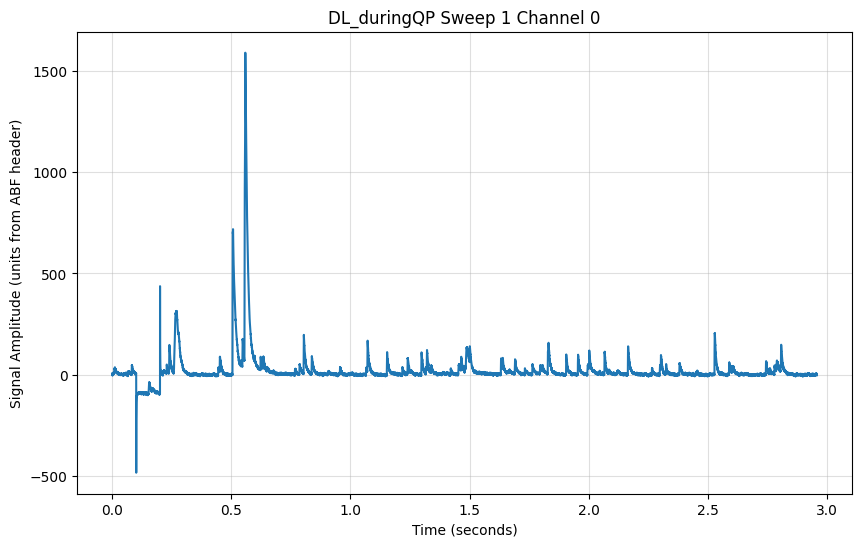

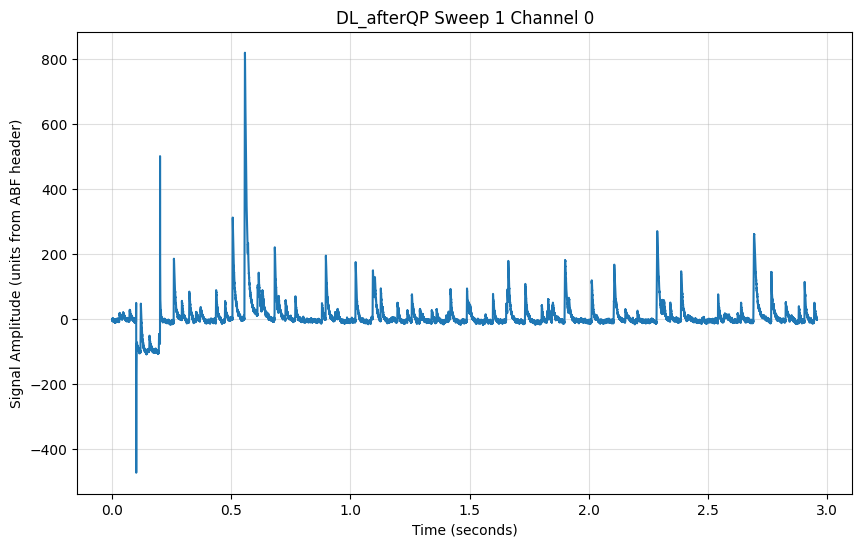

In [30]:
channel_index = 0
sweep_number = 0

data_base = abf_base.sweepY
time_base = abf_base.sweepX


data_dur = abf_dur.sweepY
time_dur = abf_dur.sweepX


data_after = abf_after.sweepY
time_after = abf_after.sweepX

# Access metadata (e.g., sampling rate)
sampling_rate = abf_base.sampleRate
plt.figure(figsize=(10, 6))
plt.plot(time_base, data_base)
plt.xlabel("Time (seconds)")
plt.ylabel("Signal Amplitude (units from ABF header)")
plt.title(f"{abf_base.abfID} Sweep {sweep_number+1} Channel {abf_base.channelList[channel_index]}")
plt.grid(alpha=0.4)
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(time_dur, data_dur)
plt.xlabel("Time (seconds)")
plt.ylabel("Signal Amplitude (units from ABF header)")
plt.title(f"{abf_dur.abfID} Sweep {sweep_number+1} Channel {abf_dur.channelList[channel_index]}")
plt.grid(alpha=0.4)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(time_after, data_after)
plt.xlabel("Time (seconds)")
plt.ylabel("Signal Amplitude (units from ABF header)")
plt.title(f"{abf_after.abfID} Sweep {sweep_number+1} Channel {abf_after.channelList[channel_index]}")
plt.grid(alpha=0.4)
plt.show()

In [21]:
abf.sweepY

array([-2.0382, -6.3107, -5.7003, ..., -2.3434, -0.5123,  2.8446],
      dtype=float32)